In [1]:
import random
from sklearn.feature_extraction.text import CountVectorizer

with open("Dataset.csv", "r", encoding="utf-8") as file:
    data = file.read()

data_mod = data.split("\n")[1:]
data_mod = [_.split(",")[:2] for _ in data_mod]
data = []

for i in data_mod:
    if len(i) == 2:
        if i[0] == "ham":
            i[0] = 0.0
        else:
            i[0] = 1.0
        data.append(i)

data_mod = data
random.shuffle(data_mod)
test = data_mod[0:40]
train = data_mod[40:]
test_x = [_[1] for _ in test]
test_y = [_[0] for _ in test]
train_x = [_[1] for _ in train]
train_y = [_[0] for _ in train]
tf_vectorizer = CountVectorizer()
train_x_tf = tf_vectorizer.transform(train_x)
test_x_tf = tf_vectorizer.transform(test_x)

Util Functions

In [2]:
from sklearn import metrics
import matplotlib.pyplot as plot


def evaluate(actual, predicted):
    print(metrics.confusion_matrix(actual, predicted))
    print(metrics.classification_report(actual, predicted))

Logistical Regression

In [3]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train_x_tf, train_y)
opt = clf.predict(test_x_tf)
evaluate(opt, test_y)

[[22  0]
 [ 1 17]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        22
         1.0       1.00      0.94      0.97        18

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



SVM

In [4]:
from sklearn import svm
clf = svm.SVC()
clf.fit(train_x_tf, train_y)
opt = clf.predict(test_x_tf)
evaluate(opt, test_y)

[[22  0]
 [ 3 15]]
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        22
         1.0       1.00      0.83      0.91        18

    accuracy                           0.93        40
   macro avg       0.94      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40



Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train_x_tf, train_y)
opt = clf.predict(test_x_tf)
evaluate(opt, test_y)

[[22  0]
 [ 0 18]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        22
         1.0       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



Adaboost

In [6]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(train_x_tf, train_y)
opt = clf.predict(test_x_tf)
evaluate(opt, test_y)

[[22  0]
 [ 1 17]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        22
         1.0       1.00      0.94      0.97        18

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



XGboost

In [7]:
from xgboost import XGBRegressor
import numpy as np
clf = XGBRegressor()
clf.fit(train_x_tf, train_y)
opt = clf.predict(test_x_tf)
opt = np.round(np.abs(opt))
evaluate(opt, test_y)

[[22  0]
 [ 1 17]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        22
         1.0       1.00      0.94      0.97        18

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



Graph

f1-score


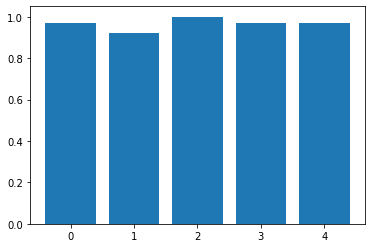

Precission


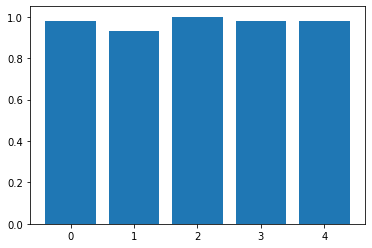

Recall


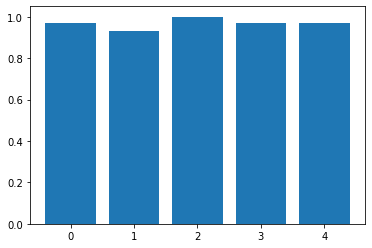

In [9]:
import matplotlib.pyplot as plot
print('f1-score')
plot.bar([0,1,2,3,4],[0.97,0.92,1.00,0.97,0.97])
plot.show()
print('Precission')
plot.clf()
plot.bar([0,1,2,3,4],[0.98,0.93,1.00,0.98,0.98])
plot.show()
print('Recall')
plot.clf()
plot.bar([0,1,2,3,4],[0.97,0.93,1.00,0.97,0.97])
plot.show()